In [1]:
import os
import pandas as pd
db_root = "/home/ndecaux/NAS_EMPENN/share/projects/actidep/bids/"

#List all subfiles in db_root
root, dirs, files = next(os.walk(db_root))
derivatives = len([d for d in dirs if d=="derivatives"])==1
print(f"Derivatives folder found: {derivatives}")
subjects=[d for d in dirs if d.startswith("sub-")]
print(f"Subjects found: {len(subjects)}")

file_db = []

#First get all source files
for sub in subjects:
    #Read all files in sub. If there's folder starting with ses-, assign a tag ses=True
    sub_path = os.path.join(root, sub)
    sub_root, sub_dirs, sub_files = next(os.walk(sub_path))
    ses = len([d for d in sub_dirs if d.startswith("ses-")])==1
    if ses:
        sessions = [d for d in sub_dirs if d.startswith("ses-")]
        for ses in sessions:
            ses_path = os.path.join(sub_path, ses)
            ses_root, ses_dirs, ses_files = next(os.walk(ses_path))
            for f in ses_files:
                if f not in file_dict:
                    file_dict[f] = []
                file_dict[f].append(os.path.join(sub, ses, f))
    else:
        sessions = [sub_root]
    for datatypes in sessions:
        datatype_root, datatype_dirs, datatype_files = next(os.walk(datatypes+'/'))
        for datatype in datatype_dirs:
            if datatype =='sourcedata':
                continue
            datatype_path = os.path.join(datatypes, datatype)
            datatype_root, datatype_dirs, datatype_files = next(os.walk(datatype_path))
            for f in datatype_files:
                if f.startswith('sub-'):
                    entities=f.replace('sub-','').replace('ses-','').split('.')[0].split('_')
                    entity_dict = {}
                    for entity in entities:
                        if '-' in entity:
                            key, value = entity.split('-', 1)
                            entity_dict[key] = value
                    extension = f.split('.')
                    extension.pop(0)
                    extension = '.'.join(extension)
                    suffix = f.split('.')[0].split('_')[-1]

                    entity_dict['extension'] = extension
                    entity_dict['suffix'] = suffix
                    entity_dict['datatype'] = datatype
                    entity_dict['subject']=sub.replace('sub-','')
                    if ses:
                        entity_dict['session']=ses
                    file_db.append(entity_dict)
                  
        
#Now get all derivatives files, (db_root/derivatives/pipeline/sub-*/<SES_IF_EXISTS>/datatype/*) and add them to the dataframe
if derivatives:
    derivatives_path = os.path.join(root, 'derivatives')
    derivatives_root, derivatives_dirs, derivatives_files = next(os.walk(derivatives_path))
    pipelines = [d for d in derivatives_dirs if not d.startswith('.')]
    for pipeline in pipelines:
        pipeline_path = os.path.join(derivatives_path, pipeline)
        pipeline_root, pipeline_dirs, pipeline_files = next(os.walk(pipeline_path))
        pipeline_subjects = [d for d in pipeline_dirs if d.startswith('sub-')]
        for sub in pipeline_subjects:
            sub_path = os.path.join(pipeline_path, sub)
            sub_root, sub_dirs, sub_files = next(os.walk(sub_path))
            ses = len([d for d in sub_dirs if d.startswith("ses-")])==1
            if ses:
                sessions = [d for d in sub_dirs if d.startswith("ses-")]
                for ses in sessions:
                    ses_path = os.path.join(sub_path, ses)
                    ses_root, ses_dirs, ses_files = next(os.walk(ses_path))
                    for datatype in ses_dirs:
                        datatype_path = os.path.join(ses_path, datatype)
                        datatype_root, datatype_dirs, datatype_files = next(os.walk(datatype_path))
                        for f in datatype_files:
                            if f.startswith('sub-'):
                                entities=f.replace('sub-','').replace('ses-','').split('.')[0].split('_')
                                entity_dict = {}
                                for entity in entities:
                                    if '-' in entity:
                                        key, value = entity.split('-', 1)
                                        entity_dict[key] = value
                                extension = f.split('.')
                                extension.pop(0)
                                extension = '.'.join(extension)
                                suffix = f.split('.')[0].split('_')[-1]

                                entity_dict['extension'] = extension
                                entity_dict['suffix'] = suffix
                                entity_dict['datatype'] = datatype
                                entity_dict['subject']=sub.replace('sub-','')
                                entity_dict['pipeline']=pipeline
                                entity_dict['derivative']=True
                                entity_dict['session']=ses
                                file_db.append(entity_dict)
            else:
                sessions = [sub_root]
                for datatypes in sessions:
                    datatype_root, datatype_dirs, datatype_files = next(os.walk(datatypes+'/'))
                    for datatype in datatype_dirs:
                        if datatype =='sourcedata':
                            continue
                        datatype_path = os.path.join(datatypes, datatype)
                        datatype_root, datatype_dirs, datatype_files = next(os.walk(datatype_path))
                        for f in datatype_files:
                            if f.startswith('sub-'):
                                entities=f.replace('sub-','').split('.')[0].split('_')
                                entity_dict = {}
                                for entity in entities:
                                    if '-' in entity:
                                        key, value = entity.split('-', 1)
                                        entity_dict[key] = value
                                extension = f.split('.')
                                extension.pop(0)
                                extension = '.'.join(extension)
                                suffix = f.split('.')[0].split('_')[-1]

                                entity_dict['extension'] = extension
                                entity_dict['suffix'] = suffix
                                entity_dict['datatype'] = datatype
                                entity_dict['subject']=sub.replace('sub-','')
                                entity_dict['pipeline']=pipeline
                                entity_dict['derivative']=True
                                file_db.append(entity_dict)
    df = pd.DataFrame(file_db)
    df
filters={'pipeline':'hcp_association_24pts','datatype': 'stats', 'desc': 'hcpdisp', 'extension': 'csv'}

#Get lines that match the filters
for key, value in filters.items():
    df = df[df[key]==value]
df = df.reset_index(drop=True)
df

Derivatives folder found: True
Subjects found: 61


,extension,suffix,datatype,subject,metric,model,pipeline,derivative,space,label,desc,algo,bundle,from,to,trans,entities
0,csv,mdf,stats,01013,NaN,NaN,hcp_association_24pts,True,NaN,NaN,hcpdisp,NaN,NaN,NaN,NaN,NaN,NaN
1,csv,mdf,stats,01020,NaN,NaN,hcp_association_24pts,True,NaN,NaN,hcpdisp,NaN,NaN,NaN,NaN,NaN,NaN
2,csv,mdf,stats,01014,NaN,NaN,hcp_association_24pts,True,NaN,NaN,hcpdisp,NaN,NaN,NaN,NaN,NaN,NaN
3,csv,mdf,stats,01008,NaN,NaN,hcp_association_24pts,True,NaN,NaN,hcpdisp,NaN,NaN,NaN,NaN,NaN,NaN
4,csv,mdf,stats,01007,NaN,NaN,hcp_association_24pts,True,NaN,NaN,hcpdisp,NaN,NaN,NaN,NaN,NaN,NaN
5,csv,mdf,stats,01006,NaN,NaN,hcp_association_24pts,True,NaN,NaN,hcpdisp,NaN,NaN,NaN,NaN,NaN,NaN
6,csv,mdf,stats,01002,NaN,NaN,hcp_association_24pts,True,NaN,NaN,hcpdisp,NaN,NaN,NaN,NaN,NaN,NaN
7,csv,mdf,stats,01017,NaN,NaN,hcp_association_24pts,True,NaN,NaN,hcpdisp,NaN,NaN,NaN,NaN,NaN,NaN
8,csv,mdf,stats,01018,NaN,NaN,hcp_association_24pts,True,NaN,NaN,hcpdisp,NaN,NaN,NaN,NaN,NaN,NaN
9,csv,mdf,stats,01001,NaN,NaN,hcp_association_24pts,True,NaN,NaN,hcpdisp,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
from actiDep.data.loader import Subject, Actidep

# db_root = "/home/ndecaux/NAS_EMPENN/share/projects/actidep/bids/"
# db_root = "/home/ndecaux/NAS_EMPENN/share/projects/actidep/IRM_Cerveau_MOI/bids/"
# sub = Subject('01',db_root=db_root)
ds = Actidep(db_root)
# print(sub.dicom_folder)
# print([f.entities for f in sub.get(suffix='dwi',extension='nii.gz')])
csv_files = ds.get_global(pipeline='hcp_association_24pts',**{'datatype': 'stats', 'desc': 'hcpdisp', 'extension': 'csv'})

In [3]:
#Load and concatenate all CSV files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

all_data = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file.path, sep=';')
    subject_id = csv_file.get_entities().get('subject')
    df['subject'] = subject_id
    all_data.append(df)
combined_df = pd.concat(all_data, ignore_index=True)
combined_df = combined_df.pivot(index='subject', columns='bundle', values='MDF')
combined_df = combined_df.replace(0, np.nan)  # Remplacer les zéros par NaN
combined_df = combined_df.dropna(how='all')  # Supprimer les lignes où toutes les valeurs sont NaN
combined_df

bundle,AFleft,AFright,ATRleft,ATRright,CA,CC1,CC2,CC3,CC4,CC5,...,TPOSTCleft,TPOSTCright,TPRECleft,TPRECright,TPREFleft,TPREFright,TPREMleft,TPREMright,UFleft,UFright
subject,,,,,,,,,,,,,,,,,,,,,
01001,9.532449,11.749550,7.154208,6.666120,4.968768,6.923357,4.381895,2.623144,4.270783,3.264374,...,8.351242,5.271009,4.447518,5.871473,4.872139,4.544127,8.939161,7.884207,2.630501,3.830423
01002,12.701073,8.339956,12.054418,7.486564,3.270949,4.201012,2.083017,3.009651,8.714619,10.458142,...,8.922863,11.584648,8.100190,10.320101,6.965801,6.754260,9.709388,9.927229,5.120547,6.309095
01006,12.103882,9.071405,8.752051,5.672588,19.093842,8.944532,5.182574,2.251123,3.429574,3.816274,...,10.250788,7.930150,3.159879,3.629569,5.180506,4.103130,7.445905,5.854303,5.365167,7.083244
01007,5.833954,5.450373,6.481959,6.556208,13.584483,8.146173,2.626016,5.839065,7.831539,2.471532,...,10.393295,11.498551,5.526000,8.931195,5.908486,5.776441,8.422978,7.467760,10.069466,6.905615
01008,16.317446,14.171910,8.218626,7.634973,4.638239,9.687800,4.377033,6.816898,5.180254,8.485647,...,10.020332,9.727690,8.418458,7.482832,8.561866,7.794556,10.136662,7.135917,8.890304,9.892275
01009,10.932281,7.258504,10.756900,6.728342,3.465143,7.876732,5.243268,3.545003,4.781078,9.162574,...,14.361651,9.697570,9.546004,7.756109,6.185862,4.415895,11.788322,5.357909,5.279460,6.717009
01010,1.449739,5.824418,3.091601,4.809813,5.328084,2.667598,3.920386,6.884076,4.302405,4.053392,...,8.302435,9.089356,6.465087,6.666313,2.075495,4.252747,7.267116,6.249470,2.910372,3.258844
01012,7.003126,5.398983,6.826513,5.745979,5.279541,7.570950,5.405001,9.032431,5.216464,4.229870,...,12.311301,11.894563,5.636443,14.672488,8.369273,7.189656,8.370863,11.021388,4.079236,3.958112
01013,6.556561,5.176445,10.025231,8.631357,2.404038,8.469352,5.308754,5.180875,2.547835,5.625798,...,11.571015,4.036653,5.734803,4.645203,6.959379,5.869411,9.305139,7.485720,7.511176,8.952592


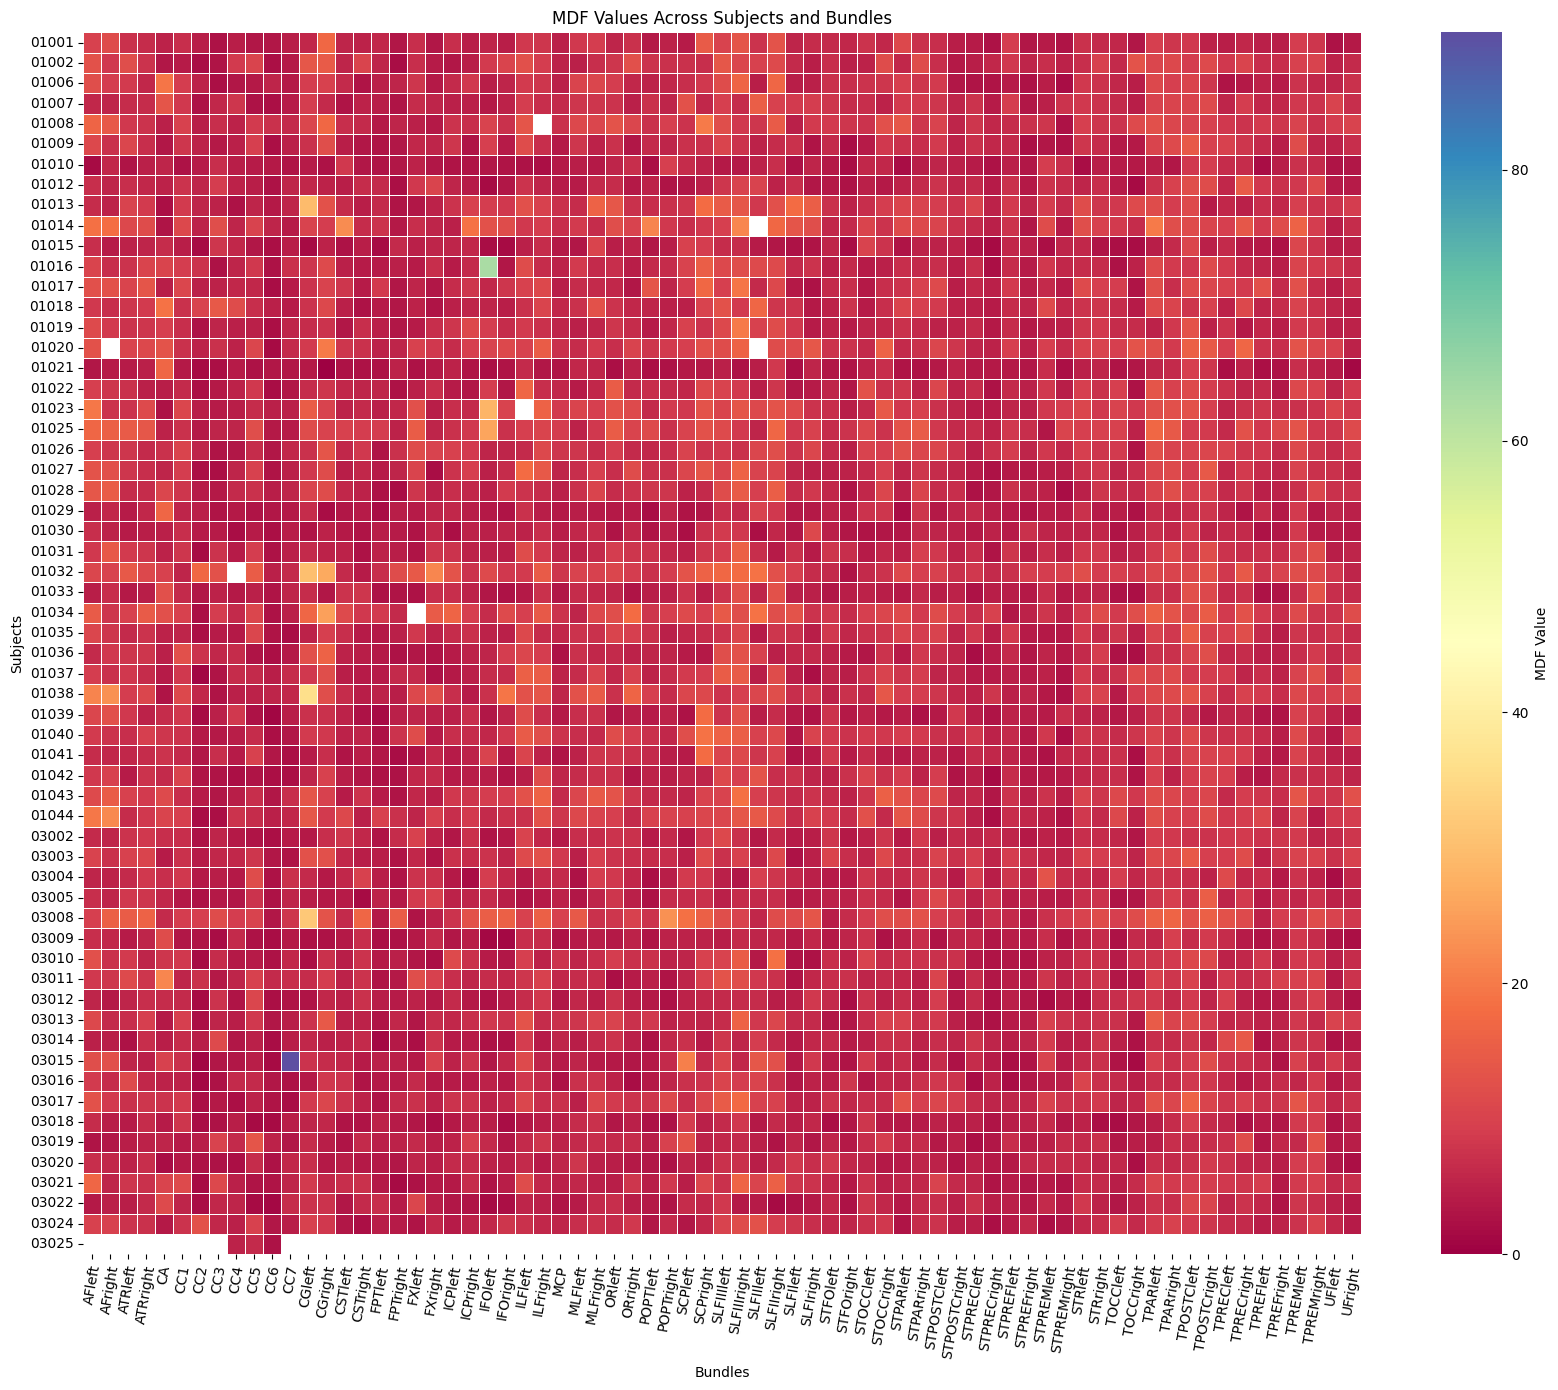

In [4]:
# Plot this and save it as a matrix with all labels displayed, colormap range 0->20
plt.figure(figsize=(17, 14))
sns.heatmap(
    combined_df,
    cmap='Spectral',
    cbar_kws={'label': 'MDF Value'},
    linewidths=0.5,
    xticklabels=True,
    yticklabels=True,
    vmin=0,
)
plt.title('MDF Values Across Subjects and Bundles')
plt.xlabel('Bundles')
plt.ylabel('Subjects')
plt.xticks(rotation=80, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('mdf_heatmap.pdf')

bundle
AFleft        9.795635
AFright       8.710039
ATRleft       7.621394
ATRright      7.773357
CA            7.681199
                ...   
TPREFright    5.562037
TPREMleft     9.377392
TPREMright    8.137724
UFleft        5.938458
UFright       6.449048
Length: 71, dtype: float64


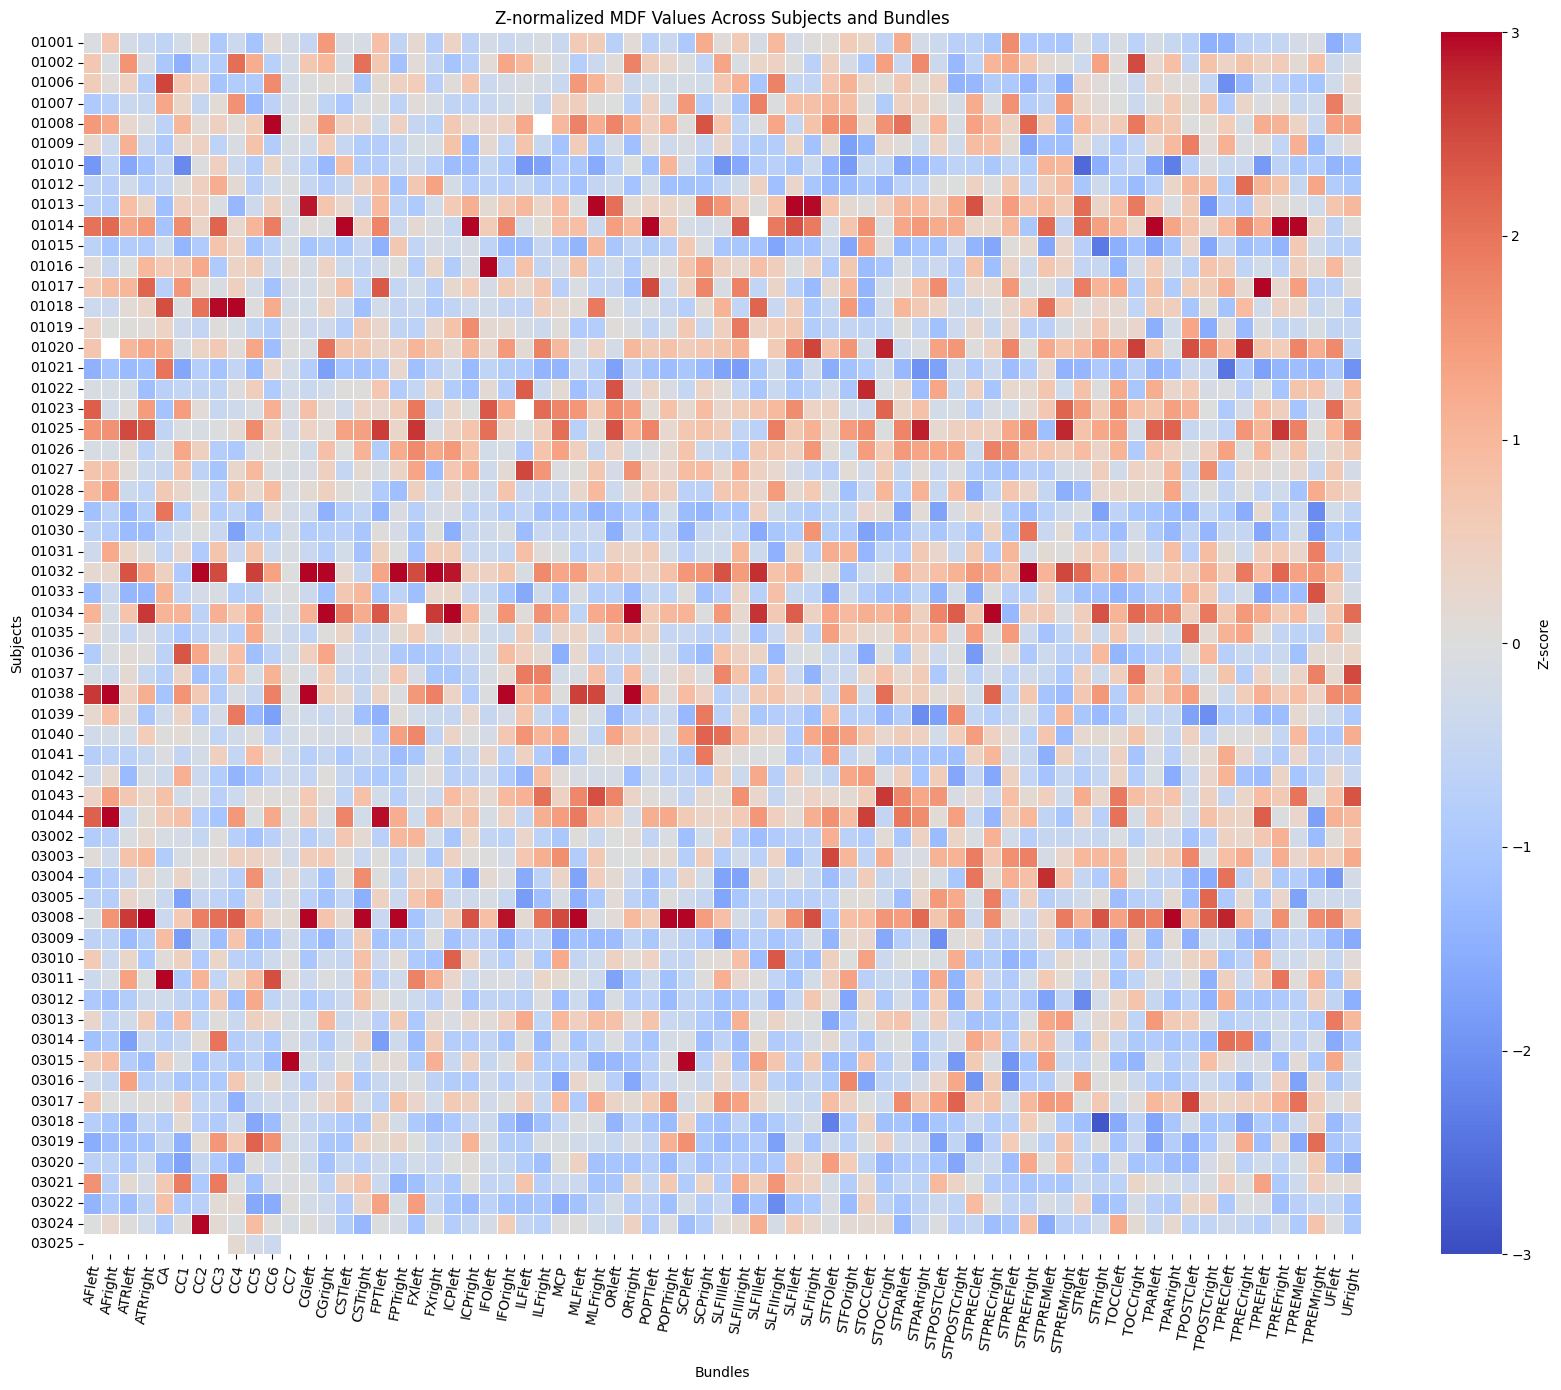

In [5]:
# Z-normalize by bundle (column) over all subjects (rows)
zscore_df = (combined_df - combined_df.mean(axis=0)) / combined_df.std(axis=0)
print(combined_df.mean(0))
# Plot the z-score matrix to detect outliers
plt.figure(figsize=(17, 14))
sns.heatmap(
    zscore_df,
    cmap='coolwarm',
    cbar_kws={'label': 'Z-score'},
    linewidths=0.5,
    xticklabels=True,
    yticklabels=True,
    vmin=-3,
    vmax=3
)
plt.title('Z-normalized MDF Values Across Subjects and Bundles')
plt.xlabel('Bundles')
plt.ylabel('Subjects')
plt.xticks(rotation=80, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('mdf_zscore_heatmap.pdf')


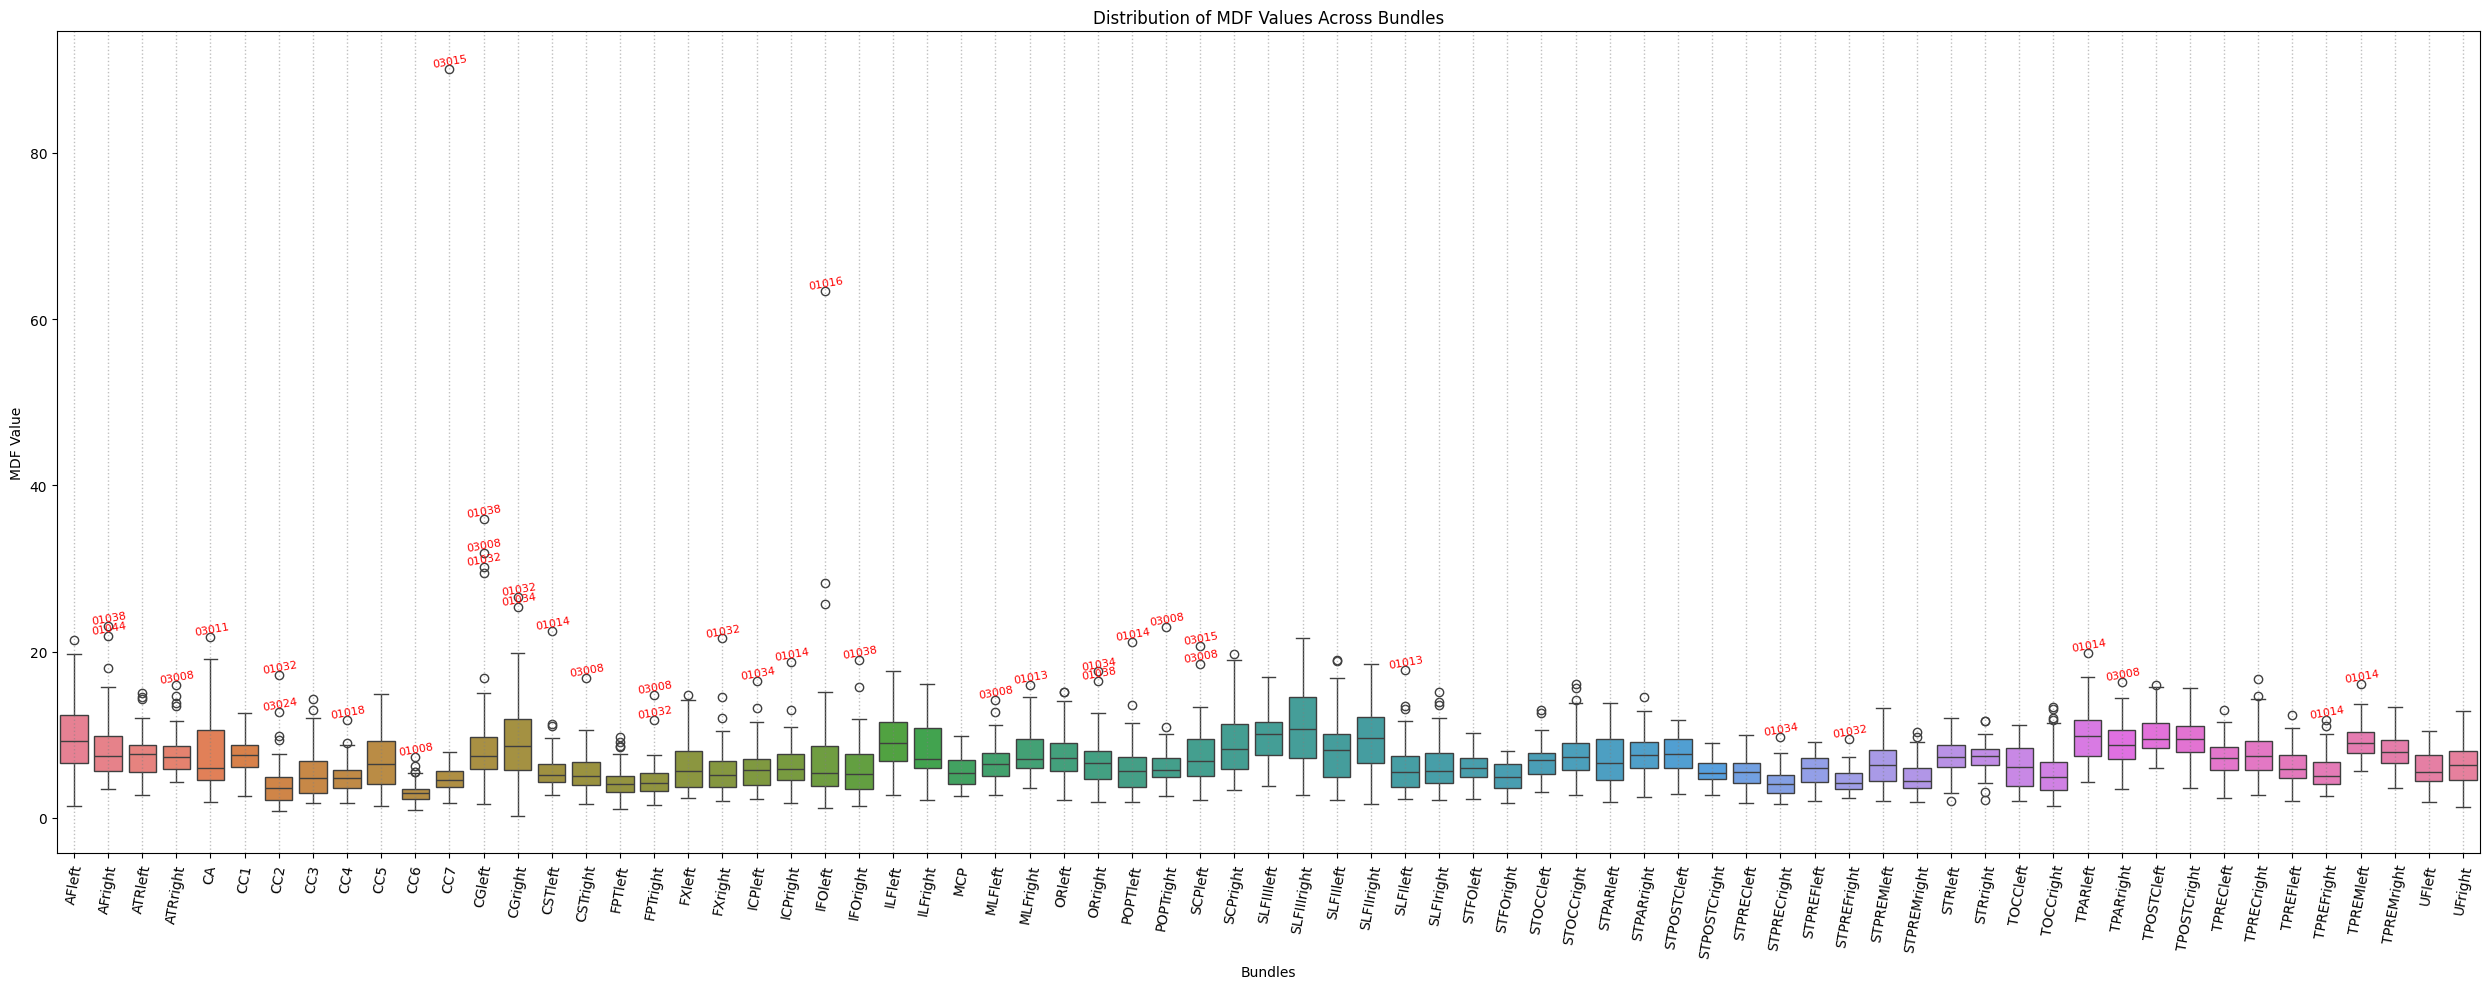

In [6]:
# Plot the distribution of MDF for each bundle
plt.figure(figsize=(25, 10))
sns.boxplot(data=combined_df, orient='v')
plt.title('Distribution of MDF Values Across Bundles')
plt.xlabel('Bundles')
plt.ylabel('MDF Value')

# Add a label for each high outlier (z-score > 3)
for i, col in enumerate(combined_df.columns):
    col_zscores = zscore_df[col]
    outliers = col_zscores[col_zscores > 3]
    for idx, z in outliers.items():
        y = combined_df.loc[idx, col]
        plt.text(i, y, '\n'+str(idx), color='red', ha='center', va='bottom', fontsize=8, rotation=10)
    # Add a dotted vertical line for each bundle
    plt.axvline(i, color='gray', linestyle=':', linewidth=1, alpha=0.5)

plt.xticks(rotation=80, ha='center')
plt.tight_layout()
plt.savefig('mdf_distribution_boxplot.pdf')


In [7]:
from tractviewer import TractViewer
from actiDep.set_config import get_HCP_bundle_names
HCP_CENTROIDS_DIR = "/home/ndecaux/NAS_EMPENN/share/projects/HCP105_Zenodo_NewTrkFormat/inGroupe1Space/Atlas/long_central_line"
HCP_FULL_BUNDLE_DIR = "/home/ndecaux/NAS_EMPENN/share/projects/HCP105_Zenodo_NewTrkFormat/inGroupe1Space/Atlas/vtk/"
HCP_REFERENCE = "/home/ndecaux/NAS_EMPENN/share/projects/HCP105_Zenodo_NewTrkFormat/inGroupe1Space/Atlas/average_anat.nii.gz"

#Get all subject + bundles that are outliers
outliers = zscore_df.stack().reset_index()
outliers = outliers[outliers[0]>3]
outliers.columns = ['subject', 'bundle', 'zscore']

#Add path to the bundle 
outliers['bundle_path'] = outliers.apply(lambda row: ds.get_global(pipeline='hcp_association_24pts', subject=row['subject'], datatype='tracto',desc='associations',bundle=row['bundle'], extension='vtk')[0].path, axis=1)
outliers['centroid_path'] = outliers.apply(lambda row: ds.get_global(pipeline='hcp_association_24pts', subject=row['subject'], datatype='tracto',desc='centroids',bundle=row['bundle'], extension='vtk')[0].path, axis=1)
outliers['model_path'] = outliers.apply(lambda row: os.path.join(HCP_CENTROIDS_DIR, f"summed_{get_HCP_bundle_names(row['bundle'])}_centroids.vtk"), axis=1)

outliers['mdf']= outliers.apply(lambda row: combined_df.loc[row['subject'], row['bundle']], axis=1)
outliers.to_csv("outliers_to_review.csv", index=False)
outliers



,subject,bundle,zscore,bundle_path,centroid_path,model_path,mdf
294,01008,CC6,3.262800,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/HCP105...,7.328851
595,01013,MLFright,3.073767,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/HCP105...,15.940784
606,01013,SLFIleft,3.794114,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/HCP105...,17.825161
652,01014,CSTleft,5.716281,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/HCP105...,22.519468
659,01014,ICPright,4.487847,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/HCP105...,18.734863
669,01014,POPTleft,4.921708,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/HCP105...,21.187757
696,01014,TPARleft,3.148549,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/HCP105...,19.877743
703,01014,TPREFright,3.018534,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/HCP105...,11.777359
704,01014,TPREMleft,3.162092,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/HCP105...,16.129425
801,01016,IFOleft,6.333225,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/actide...,/home/ndecaux/NAS_EMPENN/share/projects/HCP105...,63.341465


In [8]:
import pandas as pd
import os
from tractviewer import TractViewer

outliers = pd.read_csv("outliers_to_review.csv")

out_dir = "outliers_other_codec"

if False:
    #Remove existing files in out_dir
    import shutil
    if os.path.exists(out_dir):
        shutil.rmtree(out_dir)

    for index, row in outliers.iterrows():
        vis = TractViewer(background="black", off_screen=True)
        vis.add_dataset(
                    # "/home/ndecaux/NAS_EMPENN/share/projects/HCP105_Zenodo_NewTrkFormat/inGroupe1Space/Atlas/long_central_line/summed_AF_left_centroids.vtk",
            row['model_path'],
            {
                "display_array": None,
                "color": "red",
                "opacity": 1.0,
                "line_width": 10,
                "scalar_bar": True,  # mappé vers show_scalar_bar
                "name": "associations_enveloppe",
                "style": "surface",
            }
        ).add_dataset(
            # "/home/ndecaux/NAS_EMPENN/share/projects/actidep/bids/derivatives/hcp_association_24pts/sub-01001/tracto/sub-01001_bundle-AFleft_desc-associations_model-MCM_space-HCP_tracto.vtk",
            row['bundle_path'],
            {
                "display_array": "point_index",
                "cmap": "viridis",
                "opacity": 0.5,
                "scalar_bar": True,  # mappé vers show_scalar_bar
                "name": "associations",
                "style": "surface",
            }
        ).add_dataset(
            # "/home/ndecaux/NAS_EMPENN/share/projects/actidep/bids/derivatives/hcp_association_24pts/sub-01001/tracto/sub-01001_bundle-AFleft_desc-centroids_model-MCM_space-subject_tracto.vtk",
            row['centroid_path'],
            {
                "display_array": "point_index",
                "cmap": "viridis",
                "point_size": 20,
                "opacity": 1.0,
                "name": "centroids",
                "style": "points",
                "render_points_as_spheres": True,
            }
        )

        vid_name = f"{out_dir}/{row['subject']}_{row['bundle']}_z{row['zscore']:.2f}_mdf{row['mdf']:.2f}.mp4"
        os.makedirs(os.path.dirname(vid_name), exist_ok=True)

        vis.record_rotation(vid_name, n_frames=240, step=1.5, quality=10)


In [9]:
import os

out_dir = "/home/ndecaux/Code/actiDep/notebooks/outliers_other_codec"
files = [f for f in os.listdir(out_dir) if f.endswith('.mp4')]

# Extract MDF values from filenames
def extract_mdf(filename):
    try:
        # Filename format: ..._mdf{value}.mp4
        mdf_str = filename.split('_mdf')[-1].replace('.mp4', '')
        return float(mdf_str)
    except Exception:
        return None

files_with_mdf = [(f, extract_mdf(f)) for f in files if extract_mdf(f) is not None]
# Sort by MDF descending
files_sorted = sorted(files_with_mdf, key=lambda x: -x[1])

# Rename files with order prefix
for idx, (filename, mdf) in enumerate(files_sorted, 1):
    src = os.path.join(out_dir, filename)
    dst = os.path.join(out_dir, f"{idx:02d}_{filename}")
    os.rename(src, dst)

In [10]:
#Generate an excel file from outliers, adding a column with the path to the video
# First, create a mapping from subject/bundle to order index based on the sorted video files
video_order = {}
for idx, (filename, mdf) in enumerate(files_sorted, 1):
    # Extract subject and bundle from filename
    parts = filename.split('_')
    subject = parts[0]
    bundle = parts[1]
    video_order[(subject, bundle)] = idx

# Add the order and video path to outliers
outliers['order'] = outliers.apply(lambda row: video_order.get((row['subject'][1:], row['bundle'])), axis=1)
outliers['video_path'] = outliers.apply(
    lambda row: os.path.join(out_dir, f"{row['order']:02d}_{row['subject'][1:]}_{row['bundle']}_z{row['zscore']:.2f}_mdf{row['mdf']:.2f}.mp4"),
    axis=1
)
#Add a hyperlink formula for excel
outliers['video_link'] = outliers['video_path'].apply(lambda path: f'=HYPERLINK("{path}", "Voir")')
#Order by order
outliers = outliers.sort_values(by='order')
#Add the number of occurence of each bundle in the outliers
outliers['bundle_count'] = outliers['bundle'].map(outliers['bundle'].value_counts())
#Add the number of occurence of each subject in the outliers
outliers['subject_count'] = outliers['subject'].map(outliers['subject'].value_counts())

#Remove path (except video_path)
outliers = outliers[['subject', 'bundle', 'zscore', 'mdf', 'bundle_count', 'subject_count', 'video_link']]
#Save to excel

outliers.to_excel("outliers_to_review.xlsx", index=False)

TypeError: 'int' object is not subscriptable

In [ ]:

from tractviewer import TractViewer
sub = '03008'
sub=Subject(sub, db_root=db_root)

tracto = sub.get(suffix='tracto', desc='associations',pipeline='hcp_association_24pts', extension='vtk')
print(len(tracto))

vis = TractViewer(background="white", off_screen=True)
color_dict = {}

for t in tracto:
    print(t.path)
    # Use a large palette and match left/right bundles to the same color
    import seaborn as sns
    # Use 'husl' palette for up to 100 distinct colors
    palette = sns.color_palette("tab20", 20) + sns.color_palette("tab20b", 16)
    bundle_name = t.get_entities().get('bundle')
    # Remove 'left'/'right' to match pairs
    base_name = bundle_name.replace('left', '').replace('right', '')
    if base_name not in color_dict:
        color_dict[base_name] = palette[len(color_dict) % len(palette)]
    color = color_dict[base_name]
    vis.add_dataset(
        t.path,
        {
            "color": color,
            "opacity": 0.5,
            "scalar_bar": True,  # mappé vers show_scalar_bar
            "name": t.get_entities().get('bundle'),
            "style": "surface",
        }
    )
#Add /home/ndecaux/NAS_EMPENN/share/projects/HCP105_Zenodo_NewTrkFormat/inGroupe1Space/Atlas/average_anat.nii.gz
vis.add_dataset(
        "/home/ndecaux/NAS_EMPENN/share/projects/HCP105_Zenodo_NewTrkFormat/inGroupe1Space/Atlas/average_anat.nii.gz",
        {
            "display_array": "intensity",
            "cmap": "gray",
            "clim": (200, 800),
            "opacity": 0.3,
            "scalar_bar": False,
            "name": "anatomy",
            "ambient": 0.6,
            "specular": 0.1,
            "diffuse": 0.8,
            "style": "surface",
        }
    )

vid_name = f"all_bundles_{sub.sub_id}.mp4"
vis.record_rotation(vid_name, n_frames=240, step=1.5, quality=10)

#Save legend from color_dict as a png
import matplotlib.pyplot as plt

plt.figure(figsize=(6, len(color_dict) * 0.3))
for i, (bundle, color) in enumerate(color_dict.items()):
    plt.scatter(0, i, color=color, s=100)
    plt.text(0.1, i, bundle, va='center', fontsize=10)
plt.xlim(-0.5, 1)
plt.ylim(-1, len(color_dict))
plt.axis('off')
plt.title('Bundle Color Legend')
plt.tight_layout()
plt.savefig(f"bundle_color_legend_{sub.sub_id}.png", dpi=300)
# # coding: utf-8


#At the legend to the video generated above
import os
from moviepy import VideoFileClip, ImageClip, CompositeVideoClip
from moviepy.video.fx import Resize

video_path = "all_bundles_03008.mp4"
legend_path = "bundle_color_legend_03008.png"
output_path = "all_bundles_with_legend_03008.mp4"
if os.path.exists(video_path) and os.path.exists(legend_path):
    video_clip = VideoFileClip(video_path)

    # Load legend image, resize to 50% video height (keep aspect ratio), ensure duration matches
    from PIL import Image
    
    # Use resize method provided by moviepy, which handles the resampling internally
    legend_clip = ImageClip(legend_path,duration=video_clip.duration)
    
    #Set new size to 10% of the video size
    resizer = Resize(height=int(video_clip.h * 0.8))
    legend_clip = resizer.apply(legend_clip)
    


    # Position the legend at the bottom-right corner with some margin
    legend_width, legend_height = legend_clip.size
    video_width, video_height = video_clip.size
    margin = 10
    legend_position = (video_width - legend_width - margin, video_height - legend_height - margin)

    legend_clip.with_position(legend_position)

    # Compose final video (set_position now available with correct import)
    final_clip = CompositeVideoClip([video_clip, legend_clip])
    final_clip.write_videofile(output_path, codec='libx264', fps=video_clip.fps)
else:
    print("Video or legend file not found.")
# -*- coding: utf-8 -*-




MoviePy - Building video all_bundles_with_legend_03008.mp4.
MoviePy - Writing video all_bundles_with_legend_03008.mp4



MoviePy - Done !
MoviePy - video ready all_bundles_with_legend_03008.mp4


/home/ndecaux/Code/TractViewer/tractviewer/core.py:437: UserWarning: off_screen=True : aucune fenêtre interactive ne s'ouvrira. Passez off_screen=False pour interaction.
  warnings.warn("off_screen=True : aucune fenêtre interactive ne s'ouvrira. Passez off_screen=False pour interaction.")
/home/ndecaux/miniconda3/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/ndecaux/miniconda3/lib/python3.12/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


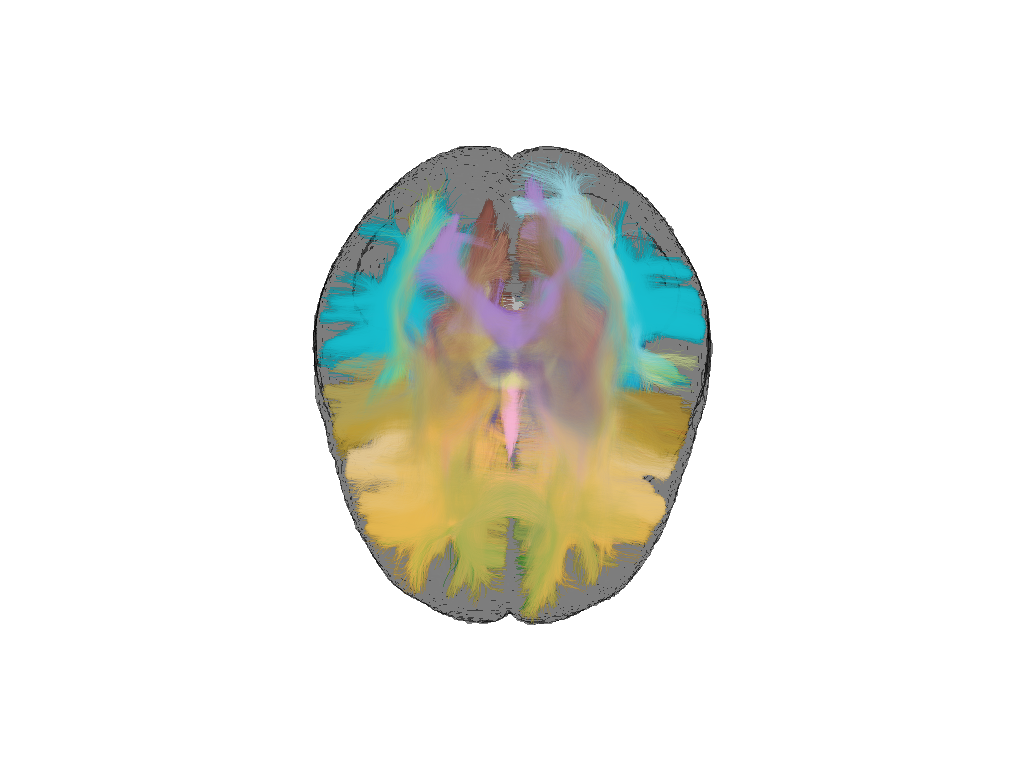

In [29]:
vis.show()